In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 20s 0us/step


In [6]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [23]:
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

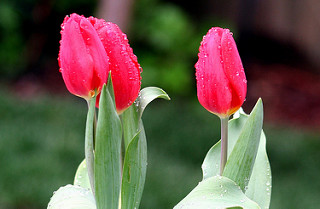

In [24]:
PIL.Image.open(tulips[0])

In [25]:
flowers_images_dict = {
    'daisy': daisy,
    'dandelion': dandelion,
    'roses': roses,
    'sunflowers': sunflowers,
    'tulips': tulips
}

flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [47]:
flowers_labels_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [48]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [50]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [54]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

daisy
633
dandelion
898
roses
641
sunflowers
699
tulips
799


In [55]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [57]:
len(X), len(y)

(3670, 3670)

In [63]:
y[-1:]

[4]

In [64]:
X

[array([[[134, 136, 136],
         [142, 142, 142],
         [146, 146, 146],
         ...,
         [152, 154, 154],
         [153, 153, 153],
         [151, 151, 151]],
 
        [[132, 134, 134],
         [140, 141, 141],
         [146, 146, 146],
         ...,
         [153, 155, 155],
         [153, 153, 153],
         [150, 150, 150]],
 
        [[131, 133, 134],
         [138, 140, 140],
         [144, 144, 145],
         ...,
         [152, 154, 154],
         [151, 151, 151],
         [146, 146, 146]],
 
        ...,
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [125, 126, 130],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [126, 127, 131],
         [125, 126, 130],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [127, 128, 132],
  

In [65]:
X = np.array(X)
y = np.array(y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2936, 180, 180, 3), (2936,), (734, 180, 180, 3), (734,))

In [72]:
X_train = X_train / 255
X_test = X_test / 255

In [85]:
model = Sequential([
    #cnn
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    #dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 35s 364ms/step - loss: 1.3897 - accuracy: 0.4108
Epoch 2/10
92/92 [==============================] - 35s 380ms/step - loss: 1.1036 - accuracy: 0.5698
Epoch 3/10
92/92 [==============================] - 33s 357ms/step - loss: 0.9589 - accuracy: 0.6315
Epoch 4/10
92/92 [==============================] - 32s 350ms/step - loss: 0.8656 - accuracy: 0.6754
Epoch 5/10
92/92 [==============================] - 31s 333ms/step - loss: 0.7155 - accuracy: 0.7364
Epoch 6/10
92/92 [==============================] - 30s 327ms/step - loss: 0.5879 - accuracy: 0.7803
Epoch 7/10
92/92 [==============================] - 30s 331ms/step - loss: 0.4769 - accuracy: 0.8232
Epoch 8/10
92/92 [==============================] - 34s 368ms/step - loss: 0.3769 - accuracy: 0.8604
Epoch 9/10
92/92 [==============================] - 30s 329ms/step - loss: 0.2922 - accuracy: 0.9012
Epoch 10/10
92/92 [==============================] - 30s 327ms/step - loss: 0.2262 - accura

In [86]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 3s 95ms/step - loss: 1.2249 - accuracy: 0.6730


[1.224858283996582, 0.6730245351791382]

In [91]:
y_pred = model.predict(X_test)

23/23 [==============================] - 2s 83ms/step


In [110]:
flower_name_list = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [113]:
def cnn_predict(index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X_test[index])
    plt.xlabel(f'pred: {flower_name_list[np.argmax(y_pred[index])]}\nfact: {flower_name_list[y_test[index]]}')

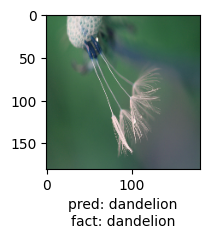

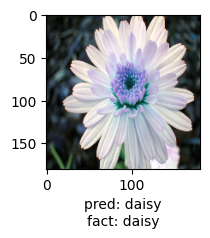

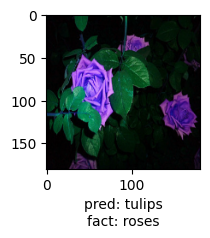

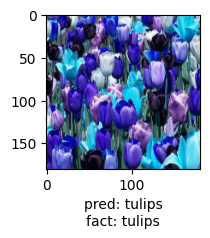

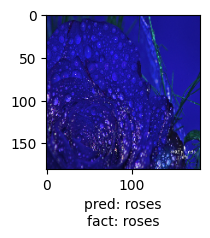

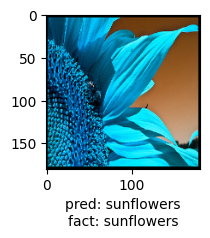

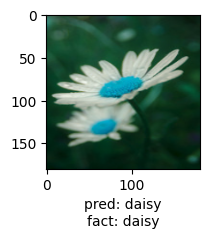

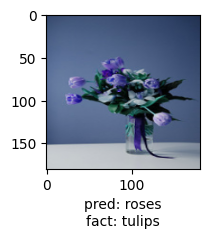

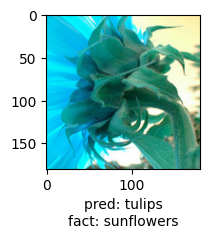

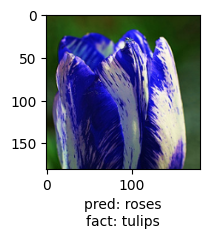

In [114]:
for i in range(10):
    cnn_predict(i)

In [98]:
print()

tulips


In [107]:
np.argmax(y_pred[2])

4

In [109]:
key_list=list(flowers_labels_dict.keys())
val_list=list(flowers_labels_dict.values())
ind=val_list.index(4)
key_list[ind]

'tulips'

Text(95.72222222222221, 0.5, 'Truth')

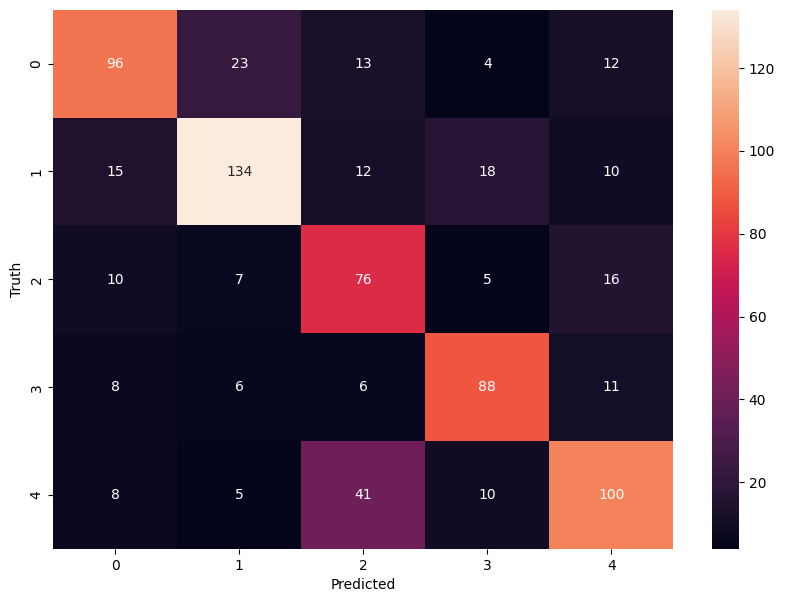

In [115]:
import seaborn as sn

y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [117]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       148
           1       0.77      0.71      0.74       189
           2       0.51      0.67      0.58       114
           3       0.70      0.74      0.72       119
           4       0.67      0.61      0.64       164

    accuracy                           0.67       734
   macro avg       0.67      0.67      0.67       734
weighted avg       0.68      0.67      0.68       734



In [241]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomRotation(0.9)
])

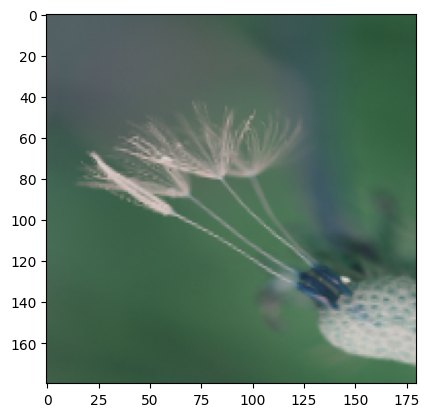

In [243]:
plt.imshow(data_augmentation(X_test)[0])

In [244]:
model_upd = Sequential([
    #cnn
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(),
    
    #dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model_upd.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_upd.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 42s 437ms/step - loss: 1.5288 - accuracy: 0.3457
Epoch 2/10
92/92 [==============================] - 46s 500ms/step - loss: 1.2240 - accuracy: 0.4700
Epoch 3/10
92/92 [==============================] - 47s 508ms/step - loss: 1.1426 - accuracy: 0.5187
Epoch 4/10
92/92 [==============================] - 49s 531ms/step - loss: 1.1058 - accuracy: 0.5463
Epoch 5/10
92/92 [==============================] - 46s 499ms/step - loss: 1.0545 - accuracy: 0.5882
Epoch 6/10
92/92 [==============================] - 43s 470ms/step - loss: 1.0028 - accuracy: 0.5957
Epoch 7/10
92/92 [==============================] - 43s 468ms/step - loss: 0.9766 - accuracy: 0.6202
Epoch 8/10
92/92 [==============================] - 45s 487ms/step - loss: 0.9428 - accuracy: 0.6362
Epoch 9/10
92/92 [==============================] - 43s 465ms/step - loss: 0.9155 - accuracy: 0.6471
Epoch 10/10
92/92 [==============================] - 40s 437ms/step - loss: 0.9126 - accura

In [246]:
model_upd.evaluate(X_test, y_test)

23/23 [==============================] - 2s 81ms/step - loss: 0.8431 - accuracy: 0.6676


[0.8430832624435425, 0.667574942111969]

In [247]:
model_upd.save("partial_model_upd.h5")

In [249]:
from keras.models import load_model

new_model_upd = load_model('partial_model_upd.h5')
new_model_upd.fit(X_train, y_train, initial_epoch=10, epochs=30)
# new_model.save("updated.h5")

Epoch 11/30
92/92 [==============================] - 45s 472ms/step - loss: 0.8927 - accuracy: 0.6611
Epoch 12/30
92/92 [==============================] - 44s 476ms/step - loss: 0.8565 - accuracy: 0.6727
Epoch 13/30
92/92 [==============================] - 41s 451ms/step - loss: 0.8281 - accuracy: 0.6897
Epoch 14/30
92/92 [==============================] - 37s 402ms/step - loss: 0.8430 - accuracy: 0.6666
Epoch 15/30
92/92 [==============================] - 38s 409ms/step - loss: 0.7998 - accuracy: 0.6941
Epoch 16/30
92/92 [==============================] - 41s 445ms/step - loss: 0.8071 - accuracy: 0.6866
Epoch 17/30
92/92 [==============================] - 37s 405ms/step - loss: 0.8022 - accuracy: 0.6914
Epoch 18/30
92/92 [==============================] - 37s 407ms/step - loss: 0.7741 - accuracy: 0.6965
Epoch 19/30
92/92 [==============================] - 37s 400ms/step - loss: 0.7937 - accuracy: 0.6975
Epoch 20/30
92/92 [==============================] - 38s 409ms/step - loss: 0.7451

In [251]:
new_model_upd.evaluate(X_test, y_test)

23/23 [==============================] - 2s 85ms/step - loss: 0.7224 - accuracy: 0.7112


[0.7224124670028687, 0.7111716866493225]

In [252]:
y_pred_new_upd = new_model_upd.predict(X_test)

23/23 [==============================] - 2s 83ms/step


Text(95.72222222222221, 0.5, 'Truth')

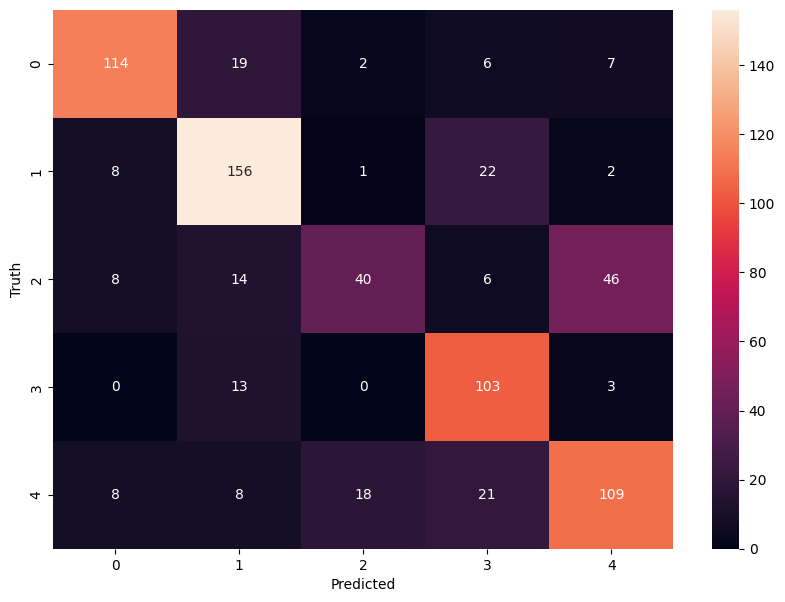

In [253]:
import seaborn as sn

y_new_upd_predicted_labels = [np.argmax(i) for i in y_pred_new_upd]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_new_upd_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [254]:
print("Classification Report: \n", classification_report(y_test, y_new_upd_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       148
           1       0.74      0.83      0.78       189
           2       0.66      0.35      0.46       114
           3       0.65      0.87      0.74       119
           4       0.65      0.66      0.66       164

    accuracy                           0.71       734
   macro avg       0.71      0.70      0.69       734
weighted avg       0.71      0.71      0.70       734



In [255]:
y_pred_upd = model_upd.predict(X_test)

23/23 [==============================] - 2s 88ms/step


Text(95.72222222222221, 0.5, 'Truth')

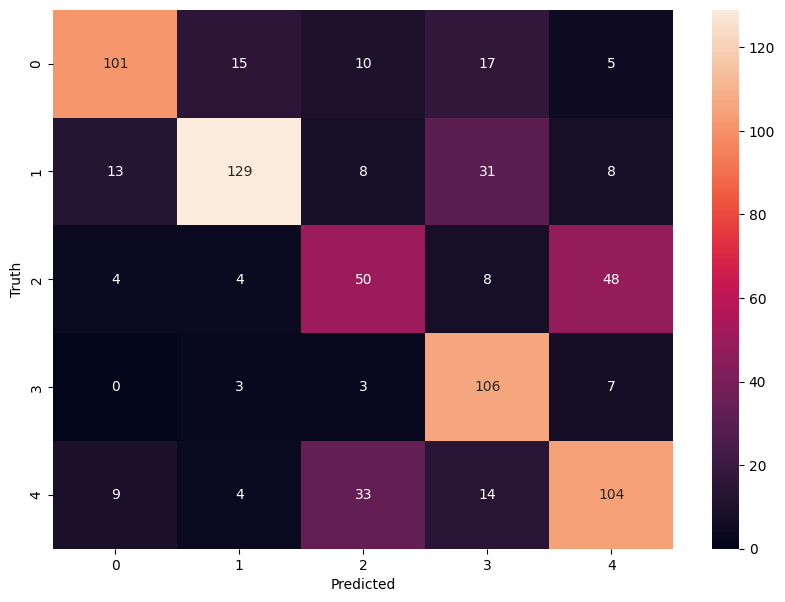

In [256]:
y_upd_predicted_labels = [np.argmax(i) for i in y_pred_upd]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_upd_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [257]:
print("Classification Report: \n", classification_report(y_test, y_upd_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       148
           1       0.83      0.68      0.75       189
           2       0.48      0.44      0.46       114
           3       0.60      0.89      0.72       119
           4       0.60      0.63      0.62       164

    accuracy                           0.67       734
   macro avg       0.66      0.67      0.66       734
weighted avg       0.68      0.67      0.67       734



In [259]:
def cnn_new_upd_predict(index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X_test[index])
    plt.xlabel(f'pred: {flower_name_list[np.argmax(y_pred_new_upd[index])]}\nfact: {flower_name_list[y_test[index]]}')

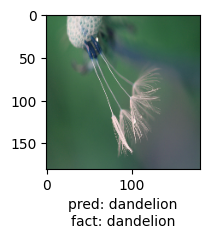

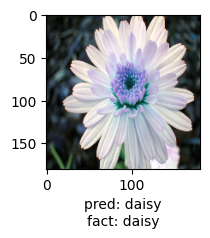

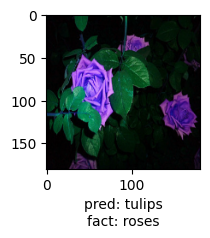

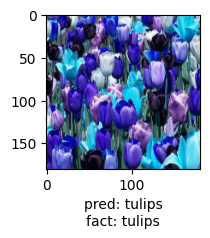

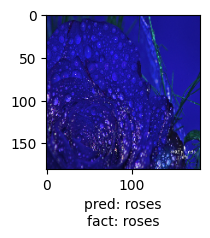

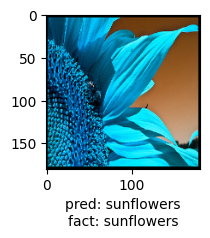

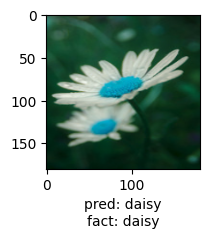

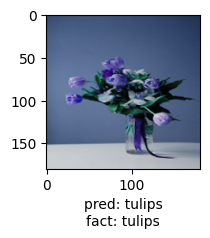

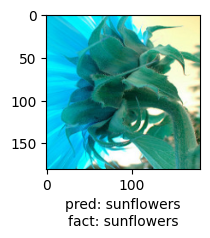

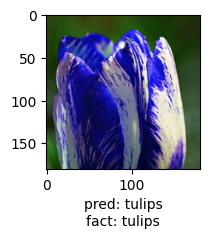

In [260]:
for i in range(10):
    cnn_new_upd_predict(i)